In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\rchar\anaconda3\envs\pyc\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## Skill count per month for data analysts
df_DS_UK = df[(df['job_title'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

df_DS_UK['job_posted_month_no'] = df_DS_UK['job_posted_date'].dt.month

# Explode job_skills column
df_DS_UK_explode = df_DS_UK.explode('job_skills')

In [3]:
# Group by month and job_skills
df_DS_UK_pivot = df_DS_UK_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DS_UK_pivot

job_skills,airflow,alteryx,angular,ansible,asp.net,assembly,atlassian,aurora,aws,azure,...,unix,vba,visual basic,vmware,watson,windows,word,wsl,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11,3,0,0,1,0,0,0,96,59,...,0,4,0,0,0,0,3,0,2,0
2,5,0,0,0,0,0,0,0,58,49,...,1,0,0,0,2,0,6,0,2,2
3,6,4,0,0,0,0,0,0,50,41,...,0,0,0,0,5,0,3,0,0,0
4,1,1,0,0,1,0,2,0,19,25,...,1,1,0,0,0,0,5,0,0,0
5,5,0,0,0,0,0,0,0,34,29,...,1,0,0,0,1,0,1,0,0,1
6,2,2,0,0,1,0,0,0,57,42,...,0,0,0,0,0,0,3,0,0,0
7,2,3,0,1,0,0,0,0,43,48,...,2,1,0,0,1,1,2,0,0,2
8,3,3,0,2,0,0,2,0,36,43,...,3,0,0,0,0,1,2,0,0,2
9,2,3,0,2,1,0,0,0,56,46,...,4,10,0,0,0,0,2,0,0,0


In [5]:
# sorts by count
df_DS_UK_pivot.loc['Total'] = df_DS_UK_pivot.sum()
df_DS_UK_pivot = df_DS_UK_pivot[df_DS_UK_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_UK_pivot = df_DS_UK_pivot.drop('Total')

df_DS_UK_pivot

job_skills,python,sql,r,aws,azure,tableau,pandas,numpy,power bi,spark,...,spreadsheet,react.js,mlr,mariadb,terminal,next.js,delphi,powershell,assembly,ruby on rails
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,299,213,122,96,59,56,47,44,31,36,...,0,0,0,0,0,0,0,0,0,0
2,209,137,79,58,49,29,27,19,15,26,...,1,0,0,0,0,0,0,0,0,0
3,163,108,58,50,41,27,33,28,21,15,...,0,0,0,0,0,0,0,0,0,0
4,113,73,36,19,25,21,20,21,16,16,...,0,0,0,0,0,0,0,0,0,0
5,113,80,51,34,29,21,23,17,18,20,...,0,0,0,0,0,0,0,0,0,1
6,199,123,88,57,42,30,40,34,28,28,...,0,0,0,0,0,0,0,0,0,0
7,168,102,60,43,48,34,34,28,26,17,...,0,0,0,1,1,0,0,0,0,0
8,171,110,82,36,43,30,19,19,29,18,...,0,1,0,0,0,1,0,0,0,0
9,245,144,98,56,46,41,42,32,35,29,...,0,0,1,0,0,0,1,0,0,0


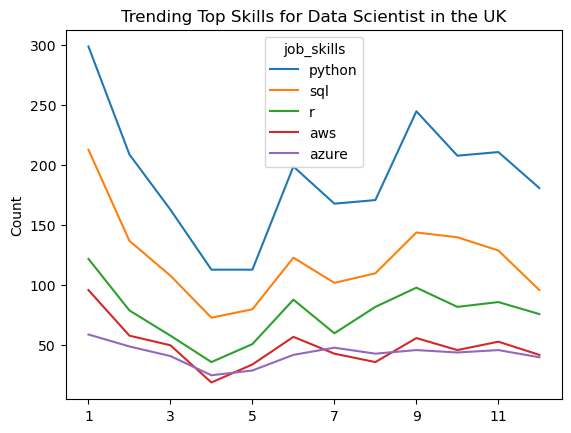

In [6]:
df_DS_UK_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Scientist in the UK')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [7]:
# Get monthly totals
DA_totals = df_DS_UK.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     397
2     269
3     217
4     156
5     150
6     242
7     194
8     220
9     326
10    266
11    261
12    228
dtype: int64

In [8]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DS_UK_percent = df_DS_UK_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DS_UK_percent = df_DS_UK_percent.reset_index()
df_DS_UK_percent['job_posted_month'] = df_DS_UK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DS_UK_percent = df_DS_UK_percent.set_index('job_posted_month')
df_DS_UK_percent = df_DS_UK_percent.drop(columns='job_posted_month_no')

df_DS_UK_percent

job_skills,python,sql,r,aws,azure,tableau,pandas,numpy,power bi,spark,...,spreadsheet,react.js,mlr,mariadb,terminal,next.js,delphi,powershell,assembly,ruby on rails
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,75.314861,53.652393,30.730479,24.181360,14.861461,14.105793,11.838791,11.083123,7.808564,9.068010,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Feb,77.695167,50.929368,29.368030,21.561338,18.215613,10.780669,10.037175,7.063197,5.576208,9.665428,...,0.371747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Mar,75.115207,49.769585,26.728111,23.041475,18.894009,12.442396,15.207373,12.903226,9.677419,6.912442,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Apr,72.435897,46.794872,23.076923,12.179487,16.025641,13.461538,12.820513,13.461538,10.256410,10.256410,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
May,75.333333,53.333333,34.000000,22.666667,19.333333,14.000000,15.333333,11.333333,12.000000,13.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.666667
Jun,82.231405,50.826446,36.363636,23.553719,17.355372,12.396694,16.528926,14.049587,11.570248,11.570248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Jul,86.597938,52.577320,30.927835,22.164948,24.742268,17.525773,17.525773,14.432990,13.402062,8.762887,...,0.000000,0.000000,0.000000,0.515464,0.515464,0.000000,0.000000,0.000000,0.00000,0.000000
Aug,77.727273,50.000000,37.272727,16.363636,19.545455,13.636364,8.636364,8.636364,13.181818,8.181818,...,0.000000,0.454545,0.000000,0.000000,0.000000,0.454545,0.000000,0.000000,0.00000,0.000000
Sep,75.153374,44.171779,30.061350,17.177914,14.110429,12.576687,12.883436,9.815951,10.736196,8.895706,...,0.000000,0.000000,0.306748,0.000000,0.000000,0.000000,0.306748,0.000000,0.00000,0.000000


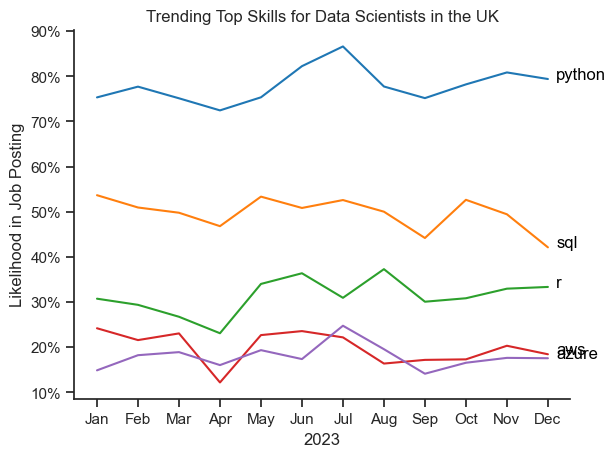

In [11]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DS_UK_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Scientists in the UK')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()